In [1]:
from scipy import *
import numpy as np
import WLanalysis
from matplotlib import pyplot

In [2]:
## generate average stats, on stampede2
# ALL_fn = genfromtxt('ALL_fn.txt',dtype='string')
# fn_list = genfromtxt('cosmo_params_all.txt',usecols=1, dtype='string')
# fnjia_list = genfromtxt('cosmo_params_all.txt',usecols=0, dtype='string')
# stats_fn = lambda iALL, ieb, icosmo: '/scratch/02977/jialiu/peakaboo/stats/'+icosmo+'/1024b512/'+ieb+'/'+iALL
# stats_dir = '/scratch/02977/jialiu/peakaboo/stats_avg/'
# for ieb in ['output_eb_5000_s4','output_tt_3000_s4']:        
#     for iALL in ALL_fn:
#         out_fn = stats_dir+'%s_%s'%(ieb, iALL)
#         print out_fn
#         out = array([mean(load(stats_fn(iALL, ieb, icosmo)),axis=0) for icosmo in fn_list])
#         save(out_fn, out)

In [3]:
z_source = arange(0.5,3,0.5)
pdf2debI = array([load('stats_avg/output_eb_5000_s4_ALL_igalXicmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])
pdf2dttI = array([load('stats_avg/output_tt_3000_s4_ALL_igalXicmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])
pdf2debN = array([load('stats_avg/output_eb_5000_s4_ALL_galXcmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])
pdf2dttN = array([load('stats_avg/output_tt_3000_s4_ALL_galXcmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])

In [4]:
params = genfromtxt('cosmo_params_all.txt',usecols=[2,3,4,5]) 

In [5]:
X, Y = meshgrid(linspace(-3,5,80), linspace(-3,3,60))
print X.shape, Y.shape, pdf2debI.shape

(60, 80) (60, 80) (5, 101, 60, 80)


/Users/jia/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


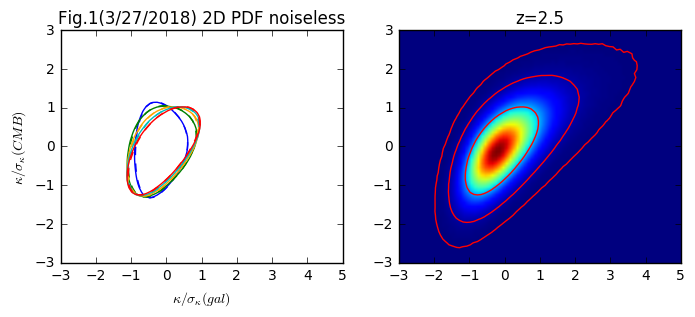

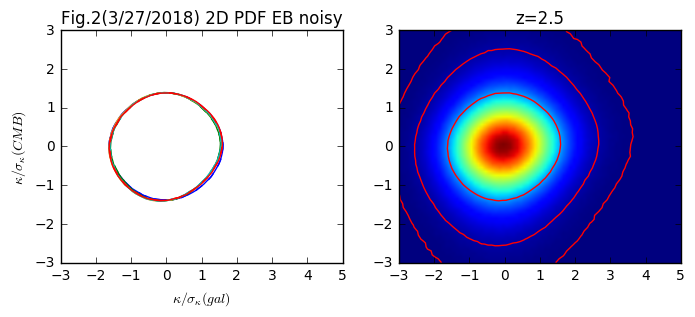

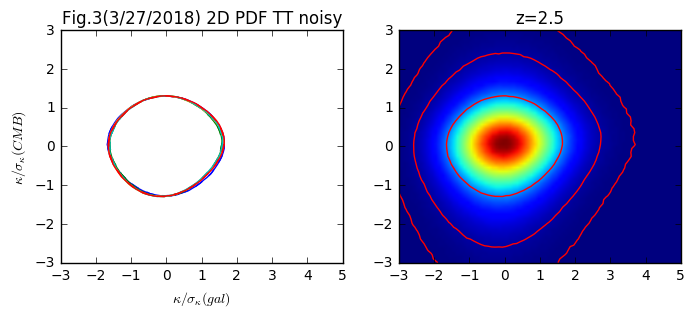

In [6]:
i = 0
titles = ['noiseless',  'EB noisy', 'TT noisy']
for pdf2ds in [pdf2debI, pdf2debN, pdf2dttN]:
    i+=1
    f, (ax1,ax2) = subplots(1,2,figsize=(8,3))
    seed(45)
    colors=['b','g','orange','c','r']
    for iz in range(5):
        icolor=rand(3)
        ipdf0 = pdf2ds[iz, 0]
        ilev0=WLanalysis.findlevel(ipdf0)
        ipdf1 = pdf2ds[iz, 1]
        ilev1=WLanalysis.findlevel(ipdf1)
        ax1.contour(X, Y, ipdf0, levels=[ilev0[0],], colors=colors[iz],label='z=%.1f'%(z_source[iz]))
        ax1.contour(X, Y, ipdf1, levels=[ilev1[0],], colors=colors[iz], linestyles='dashed')
        if iz==4:
            ax2.imshow(ipdf0,extent=[-3,5,-3,3], origin='lower',aspect='auto')
            ax2.contour(X, Y,ipdf0, levels=sort(ilev0), colors='r',label='z=%.1f'%(z_source[iz]))
    ax1.legend(loc=0,frameon=0, fontsize=10)
    #ax1.set_xlim(-2,2)
    #ax1.set_ylim(-2,2)
    ax1.set_xlabel(r'$\kappa/\sigma_\kappa (gal)$')
    ax1.set_ylabel(r'$\kappa/\sigma_\kappa (CMB)$')
    ax1.set_title('Fig.%i(3/27/2018) 2D PDF %s'%(i, titles[i-1]))
    ax2.set_title('z=2.5')
    show()   


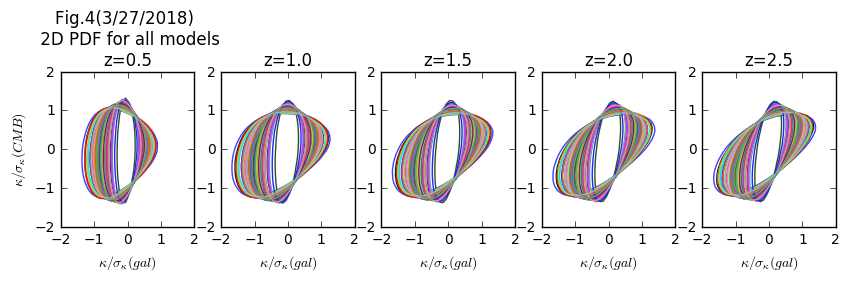

In [7]:
f, axes = subplots(1,5,figsize=(10,2))
for iz in range(5):
    seed(45)
    for ipdf2ds in pdf2debI[iz]:
        icolor=[rand(3),]
        ilev=WLanalysis.findlevel(ipdf2ds)
        axes[iz].contour(X, Y, ipdf2ds, levels=[ilev[0],],colors=icolor)
    axes[iz].set_title('z=%.1f'%(z_source[iz]))
    axes[iz].set_xlim(-2,2)
    axes[iz].set_ylim(-2,2)
    axes[iz].locator_params(tight=True, nbins=4)
    axes[iz].set_xlabel(r'$\kappa/\sigma_\kappa (gal)$')

ax1=axes[0]
ax1.legend(loc=0,frameon=0, fontsize=10)
ax1.set_ylabel(r'$\kappa/\sigma_\kappa (CMB)$')
ax1.set_title('Fig.4(3/27/2018) \n 2D PDF for all models\nz=0.5')
show()

In [8]:
pdf2debI.shape

(5, 101, 60, 80)

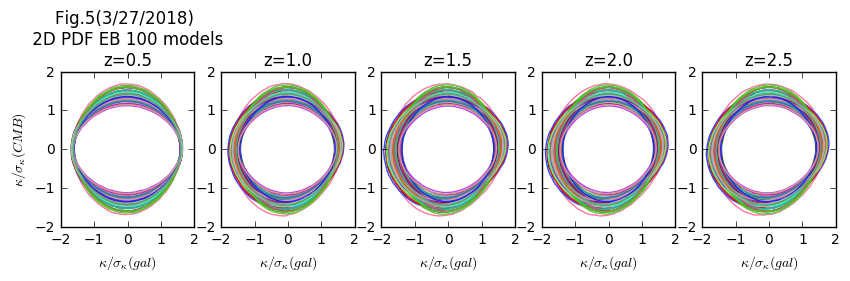

In [9]:
f, axes = subplots(1,5,figsize=(10,2))
for iz in range(5):
    seed(45)
    for ipdf2ds in pdf2debN[iz]:
        icolor=[rand(3),]
        ilev=WLanalysis.findlevel(ipdf2ds)
        axes[iz].contour(X, Y, ipdf2ds, levels=[ilev[0],],colors=icolor)
    axes[iz].set_title('z=%.1f'%(z_source[iz]))
    axes[iz].set_xlim(-2,2)
    axes[iz].set_ylim(-2,2)
    axes[iz].locator_params(tight=True, nbins=4)
    axes[iz].set_xlabel(r'$\kappa/\sigma_\kappa (gal)$')

ax1=axes[0]
ax1.legend(loc=0,frameon=0, fontsize=10)
ax1.set_ylabel(r'$\kappa/\sigma_\kappa (CMB)$')
ax1.set_title('Fig.5(3/27/2018) \n 2D PDF EB 100 models \nz=0.5')
show()

In [10]:
PDF2dInterp = [WLanalysis.buildInterpolator(pdf2debI[i].reshape(len(params),-1), params[:,:-1]) for i in range(5)]

In [11]:
PDF2dInterp[0]([0.09, 0.3, 2.1])

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         2.18813070e-07,   2.50651207e-07,   2.41215875e-07])

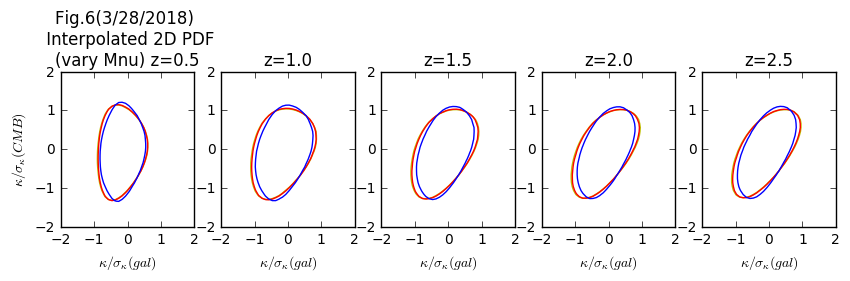

In [12]:
f, axes = subplots(1,5,figsize=(10,2))
for iz in range(5):    
    i=0
    for imnu in (0.0, 0.1, 0.6): 
        ipdf2ds = PDF2dInterp[iz]([imnu, 0.3, 2.1]).reshape(60, 80)
        ilev=WLanalysis.findlevel(ipdf2ds)
        axes[iz].contour(X, Y, ipdf2ds, levels=[ilev[0],],colors=['y','r','b'][i])
        i+=1
    axes[iz].set_title('z=%.1f'%(z_source[iz]))
    axes[iz].set_xlim(-2,2)
    axes[iz].set_ylim(-2,2)
    axes[iz].locator_params(tight=True, nbins=4)
    axes[iz].set_xlabel(r'$\kappa/\sigma_\kappa (gal)$')

ax1=axes[0]
ax1.legend(loc=0,frameon=0, fontsize=10)
ax1.set_ylabel(r'$\kappa/\sigma_\kappa (CMB)$')
ax1.set_title('Fig.6(3/28/2018) \n Interpolated 2D PDF\n(vary Mnu) z=0.5')
show()

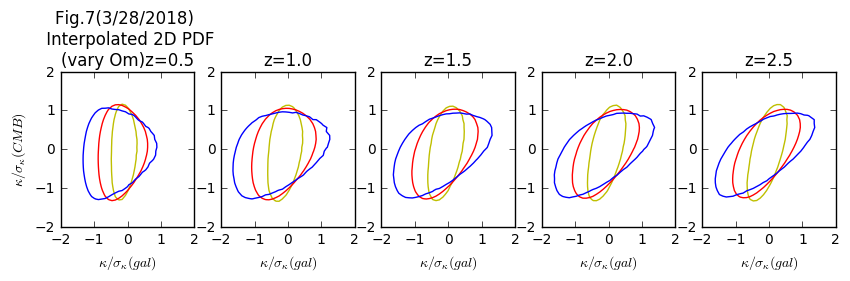

In [13]:
f, axes = subplots(1,5,figsize=(10,2))
for iz in range(5):    
    i=0
    for iom in (0.2, 0.3, 0.4): 
        ipdf2ds = PDF2dInterp[iz]([0.1, iom, 2.1]).reshape(60, 80)
        ilev=WLanalysis.findlevel(ipdf2ds)
        axes[iz].contour(X, Y, ipdf2ds, levels=[ilev[0],],colors=['y','r','b'][i])
        i+=1
    axes[iz].set_title('z=%.1f'%(z_source[iz]))
    axes[iz].set_xlim(-2,2)
    axes[iz].set_ylim(-2,2)
    axes[iz].locator_params(tight=True, nbins=4)
    axes[iz].set_xlabel(r'$\kappa/\sigma_\kappa (gal)$')

ax1=axes[0]
ax1.legend(loc=0,frameon=0, fontsize=10)
ax1.set_ylabel(r'$\kappa/\sigma_\kappa (CMB)$')
ax1.set_title('Fig.7(3/28/2018) \n Interpolated 2D PDF\n(vary Om)z=0.5')
show()

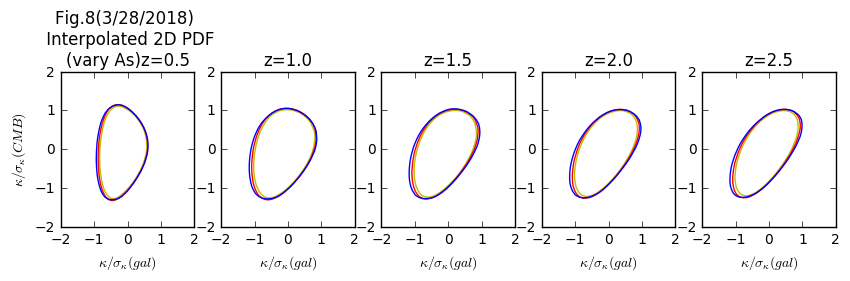

In [14]:
f, axes = subplots(1,5,figsize=(10,2))
for iz in range(5):    
    i=0
    for iAs in (1.9,2.1,2.3): 
        ipdf2ds = PDF2dInterp[iz]([0.1, 0.3, iAs]).reshape(60, 80)
        ilev=WLanalysis.findlevel(ipdf2ds)
        axes[iz].contour(X, Y, ipdf2ds, levels=[ilev[0],],colors=['y','r','b'][i])
        i+=1
    axes[iz].set_title('z=%.1f'%(z_source[iz]))
    axes[iz].set_xlim(-2,2)
    axes[iz].set_ylim(-2,2)
    axes[iz].locator_params(tight=True, nbins=4)
    axes[iz].set_xlabel(r'$\kappa/\sigma_\kappa (gal)$')

ax1=axes[0]
ax1.legend(loc=0,frameon=0, fontsize=10)
ax1.set_ylabel(r'$\kappa/\sigma_\kappa (CMB)$')
ax1.set_title('Fig.8(3/28/2018) \n Interpolated 2D PDF\n(vary As)z=0.5')
show()

In [15]:
######## now try to do a fisher forecast for 2d PDF, but first, we need to reduce the dimensions to ~1000
######## so each redshift should be Nd<=200, or ~15 bins per dimension (currently 60 x 80)
reshaper15 = lambda imat: sum(imat[:,:,:60].reshape(101, 15, 4, 15, 4), axis=(2,4))

In [16]:
print pdf2debI.shape, pdf2debI[0][:,:,:60].shape

(5, 101, 60, 80) (101, 60, 60)


In [17]:
reshaped_pdf_test60 = pdf2debI[4][0][:,:60].copy()
reshaped_pdf_test15 = reshaper15(pdf2debI[4])[0]

reshaped_pdf_test60[reshaped_pdf_test60<=0]=nan
reshaped_pdf_test15[reshaped_pdf_test15<=0]=nan

#print sum(~isnan(reshaped_pdf_test15))

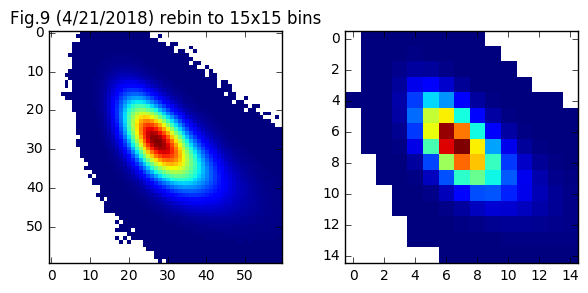

In [39]:
f, (ax1, ax2) = subplots(1,2,figsize=(7,3))
ax1.imshow(reshaped_pdf_test60,interpolation='nearest')
ax2.imshow(reshaped_pdf_test15,interpolation='nearest')
ax1.set_title('Fig.9 (4/21/2018) rebin to 15x15 bins')
show()

In [20]:
pdf2dI_cov = array([load('box5/output_eb_5000_s4/ALL_igalXicmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])
pdf2dN_cov = array([load('box5/output_eb_5000_s4/ALL_galXcmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])
pdf2dI_cov = sum(pdf2dI_cov[:,:,:,:60].reshape(5, 10000, 15, 4, 15, 4), axis=(3,5))
pdf2dN_cov = sum(pdf2dN_cov[:,:,:,:60].reshape(5, 10000, 15, 4, 15, 4), axis=(3,5))

In [21]:
print pdf2dI_cov.shape

(5, 10000, 15, 15)


In [32]:
pdf2dI_cov_flat = swapaxes(pdf2dI_cov, 0,1).reshape(10000,-1)
idxI_NZ = where( amin(pdf2dI_cov_flat,axis=0)>0)[0]
covInput = cov(pdf2dI_cov_flat[:, idxI_NZ], rowvar = 0)
print idxI_NZ.shape, pdf2dI_cov_flat[:, idxI_NZ].shape, covInput.shape
covII = mat(covInput).I

pdf2dN_cov_flat = swapaxes(pdf2dN_cov, 0,1).reshape(10000,-1)
idxN_NZ = where( amin(pdf2dN_cov_flat,axis=0)>0)[0]
covN = cov(pdf2dN_cov_flat[:, idxN_NZ], rowvar = 0)
covIN = mat(covN).I
print idxN_NZ.shape, pdf2dN_cov_flat[:, idxN_NZ].shape, covIN.shape


(426,) (10000, 426) (426, 426)
(907,) (10000, 907) (907, 907)


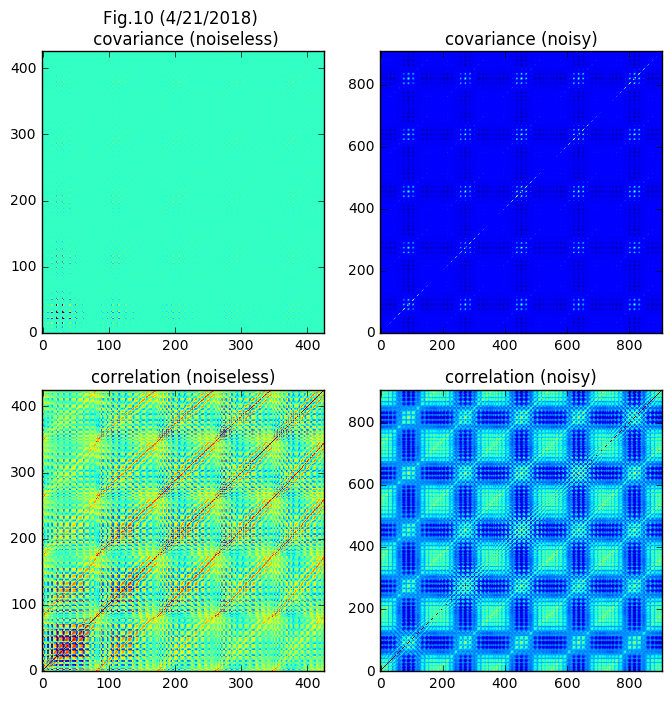

In [38]:
f, ((ax1, ax2),(ax1b, ax2b)) = subplots(2,2,figsize=(8,8))
ax1.imshow(covInput,interpolation='nearest',origin='lower')
ax2.imshow(covN,interpolation='nearest',origin='lower')
ax1b.imshow(WLanalysis.corr_mat(covInput),interpolation='nearest',origin='lower')
ax2b.imshow(WLanalysis.corr_mat(covN),interpolation='nearest',origin='lower')

ax1.set_title('Fig.10 (4/21/2018) \n covariance (noiseless)')
ax2.set_title('covariance (noisy)')
ax1b.set_title('correlation (noiseless)')
ax2b.set_title('correlation (noisy)')
show()

In [31]:
stats_I = swapaxes(sum(pdf2debI[:,:,:,:60].reshape(5, 101, 15, 4, 15, 4), axis=(3,5)), 0, 1)
stats_N = swapaxes(sum(pdf2debN[:,:,:,:60].reshape(5, 101, 15, 4, 15, 4), axis=(3,5)), 0, 1)

PDF2dInterpI_15bins = WLanalysis.buildInterpolator(stats_I.reshape(len(params),-1)[:, idxI_NZ], params[:,:-1])
PDF2dInterpN_15bins = WLanalysis.buildInterpolator(stats_N.reshape(len(params),-1)[:, idxN_NZ], params[:,:-1])

In [42]:
def Fisher(covI, der):
    '''
    Input: covariance inverse matrix (Nbin, Nbin)
    derivatives (Nparams, Nbin), where Nparams is the number of parameters 
    Return the Fisher matrix'''
    Nparams, Nbin = der.shape
    F = zeros( shape= (Nparams, Nparams))
    for i in range(Nparams):
        for j in range(Nparams):
            dA, dB = der[i], der[j]
            Mij = mat(dA).T*mat(dB) + mat(dB).T*mat(dA)  
            F [i,j]= 0.5*trace(CovI*Mij)
    Ferr = real(sqrt(mat(F).I)) [range(Nparams), range(Nparams)]
    return F, Ferr